In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
cardio_data = pd.read_excel("cardio_train.xlsx")

# Exploratory Analysis

In [3]:
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Count'>

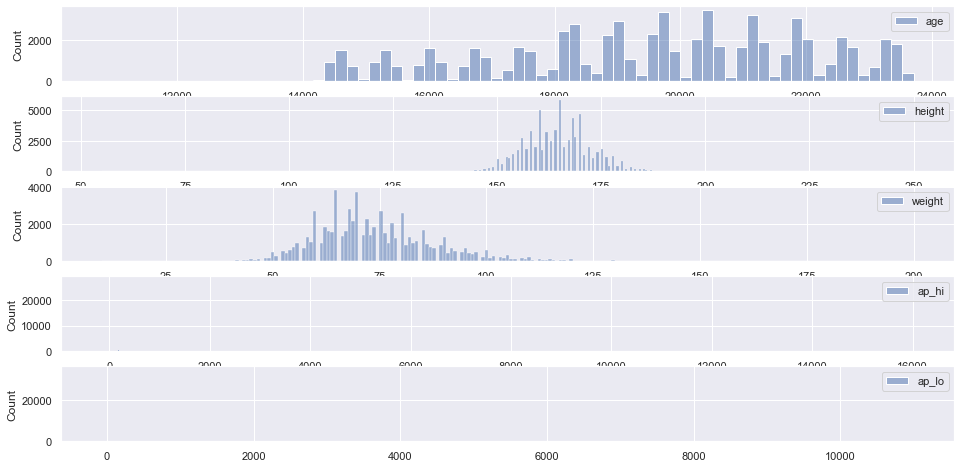

In [5]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.histplot(data = cardio_data[["age"]], ax = axes[0])
sb.histplot(data = cardio_data[["height"]], ax = axes[1])
sb.histplot(data = cardio_data[["weight"]], ax = axes[2])
sb.histplot(data = cardio_data[["ap_hi"]], ax = axes[3])
sb.histplot(data = cardio_data[["ap_lo"]], ax = axes[4])

<AxesSubplot:>

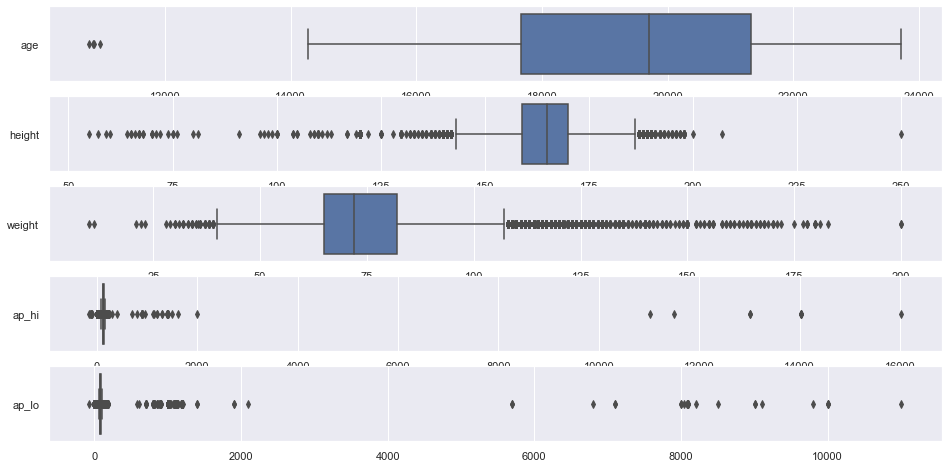

In [6]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.boxplot(data = cardio_data[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = cardio_data[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = cardio_data[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = cardio_data[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = cardio_data[["ap_lo"]], ax = axes[4], orient = "h")

# Cleaning up the data

In [7]:
cardio_data.drop(cardio_data[cardio_data['ap_hi'] > 180].index, inplace = True)
cardio_data.drop(cardio_data[cardio_data['ap_hi'] < 90].index, inplace = True)
#hypertensive crisis

cardio_data.drop(cardio_data[cardio_data['ap_lo'] > 120].index, inplace = True)
cardio_data.drop(cardio_data[cardio_data['ap_lo'] < 60].index, inplace = True)
#lowest before death

cardio_data.drop(cardio_data[cardio_data['weight'] < 40].index, inplace = True)

cardio_data.drop(cardio_data[cardio_data['height'] < 120].index, inplace = True)

cardio_data['smoke'] = cardio_data['smoke'].astype('bool')
cardio_data['active'] = cardio_data['active'].astype('bool')
cardio_data['cardio'] = cardio_data['cardio'].astype('bool')
cardio_data['alco'] = cardio_data['alco'].astype('bool')

In [8]:
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,False,False,True,False
1,1,20228,1,156,85.0,140,90,3,1,False,False,True,True
2,2,18857,1,165,64.0,130,70,3,1,False,False,False,True
3,3,17623,2,169,82.0,150,100,1,1,False,False,True,True
4,4,17474,1,156,56.0,100,60,1,1,False,False,False,False


In [9]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000
mean,49969.393781,19462.447312,1.348809,164.435023,74.122383,126.444611,81.269406,1.363462,1.225257
std,28856.287036,2468.179452,0.476597,7.904059,14.229005,15.955209,9.140053,0.678231,0.571361
min,0.000000,10798.000000,1.000000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000
25%,24987.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000
50%,50009.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000
75%,74879.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000


# let total_unhealthy = sum(inverse(active), alco, smoke)

# replaced uses "inactive" NOT "active"

In [10]:
replaced = cardio_data.copy()
replaced['inactive'] = ~replaced['active']
replaced = replaced.drop(columns=['active'], axis=1)

In [11]:
column_names = ['alco', 'inactive', 'smoke']
replaced['total_unhealthy']= replaced[column_names].sum(axis=1)

In [12]:
replaced.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,inactive,total_unhealthy
0,0,18393,2,168,62.0,110,80,1,1,False,False,False,False,0
1,1,20228,1,156,85.0,140,90,3,1,False,False,True,False,0
2,2,18857,1,165,64.0,130,70,3,1,False,False,True,True,1
3,3,17623,2,169,82.0,150,100,1,1,False,False,True,False,0
4,4,17474,1,156,56.0,100,60,1,1,False,False,False,True,1


In [13]:
replaced.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000,68109.000000
mean,49969.393781,19462.447312,1.348809,164.435023,74.122383,126.444611,81.269406,1.363462,1.225257,0.337371
std,28856.287036,2468.179452,0.476597,7.904059,14.229005,15.955209,9.140053,0.678231,0.571361,0.566740
min,0.000000,10798.000000,1.000000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000,0.000000
25%,24987.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000
50%,50009.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,74879.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,3.000000


<AxesSubplot:>

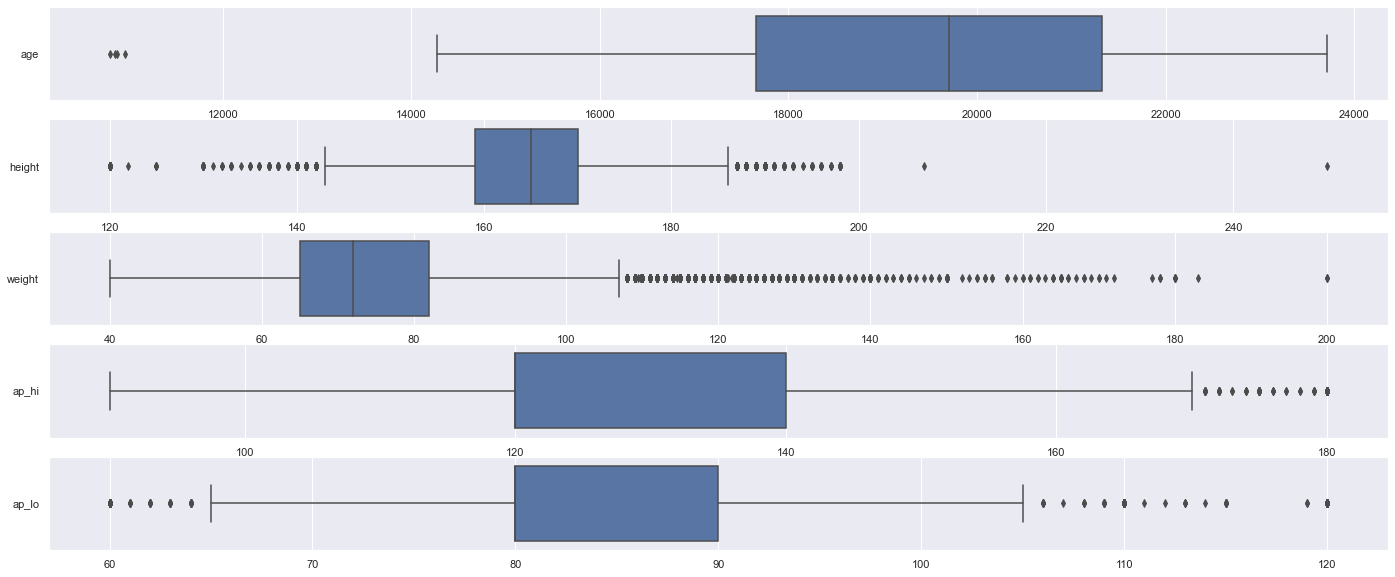

In [14]:
f, axes = plt.subplots(5, 1, figsize=(24, 10))

sb.boxplot(data = replaced[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = replaced[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = replaced[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = replaced[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = replaced[["ap_lo"]], ax = axes[4], orient = "h")

<AxesSubplot:ylabel='Count'>

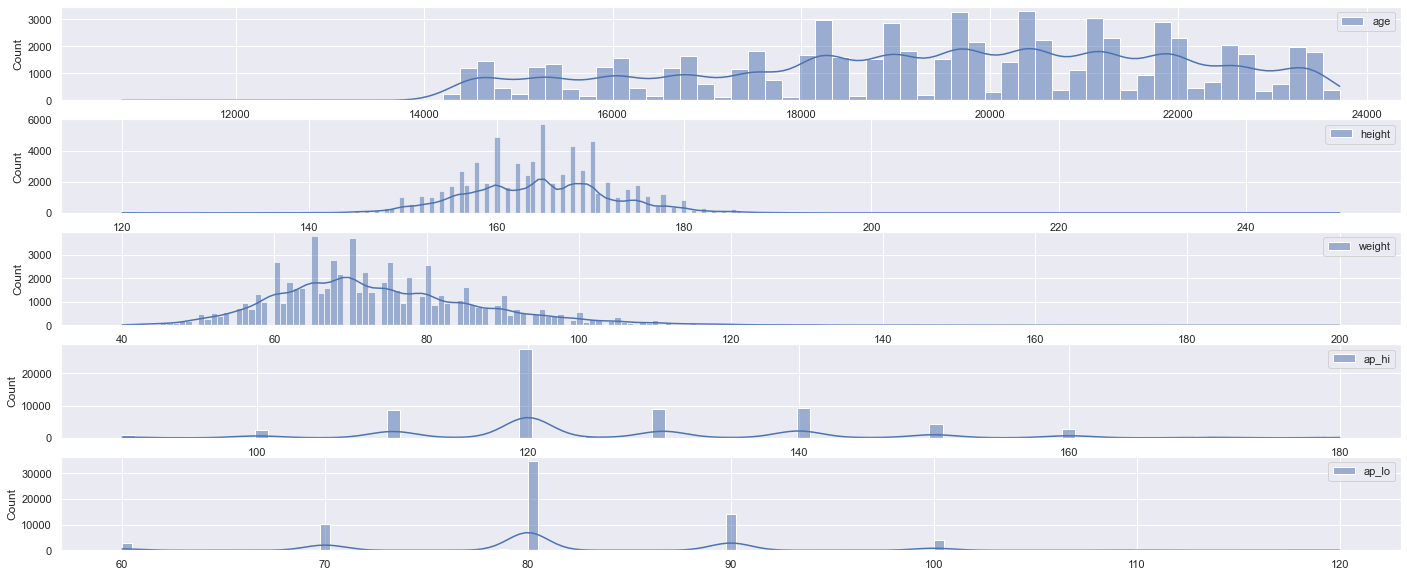

In [15]:
f, axes = plt.subplots(5, 1, figsize=(24, 10))

sb.histplot(data = replaced[["age"]], ax = axes[0], kde = True)
sb.histplot(data = replaced[["height"]], ax = axes[1], kde = True)
sb.histplot(data = replaced[["weight"]], ax = axes[2], kde = True)
sb.histplot(data = replaced[["ap_hi"]], ax = axes[3], kde = True)
sb.histplot(data = replaced[["ap_lo"]], ax = axes[4], kde = True)

<AxesSubplot:xlabel='count', ylabel='total_unhealthy'>

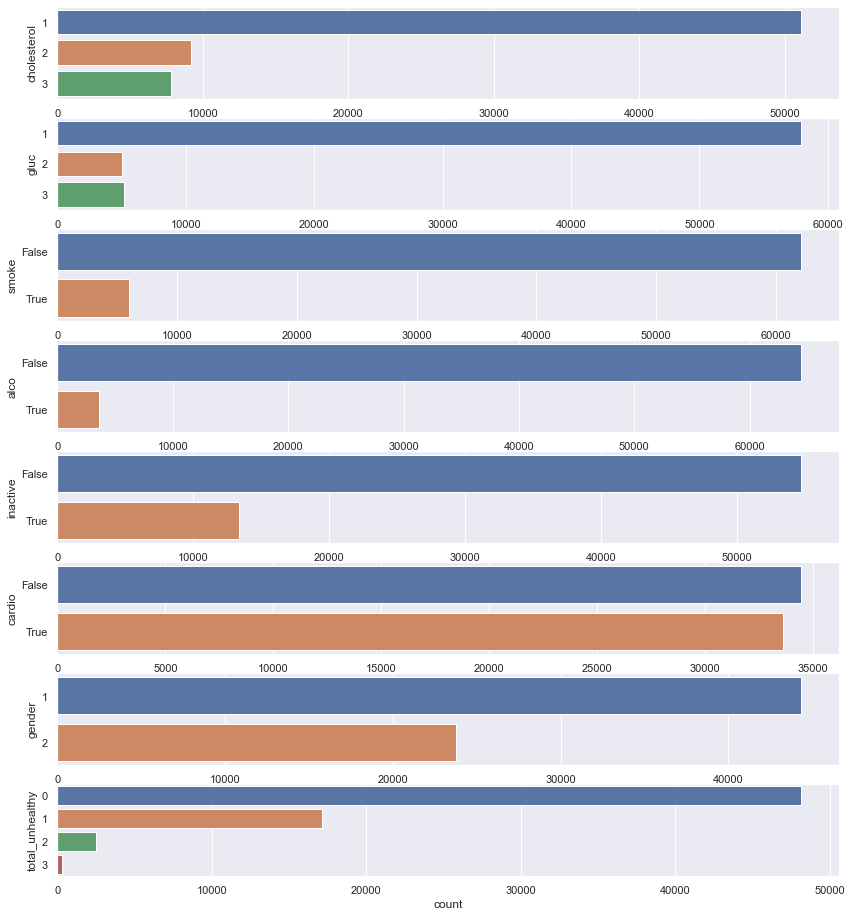

In [16]:
f, axes = plt.subplots(8, 1, figsize=(14, 16))

sb.countplot(data = replaced, ax = axes[0], y = "cholesterol")
sb.countplot(data = replaced, ax = axes[1], y = "gluc")
sb.countplot(data = replaced, ax = axes[2], y = "smoke")
sb.countplot(data = replaced, ax = axes[3], y = "alco")
sb.countplot(data = replaced, ax = axes[4], y = "inactive")
sb.countplot(data = replaced, ax = axes[5], y = "cardio")
sb.countplot(data = replaced, ax = axes[6], y = "gender")
sb.countplot(data = replaced, ax = axes[7], y = "total_unhealthy")

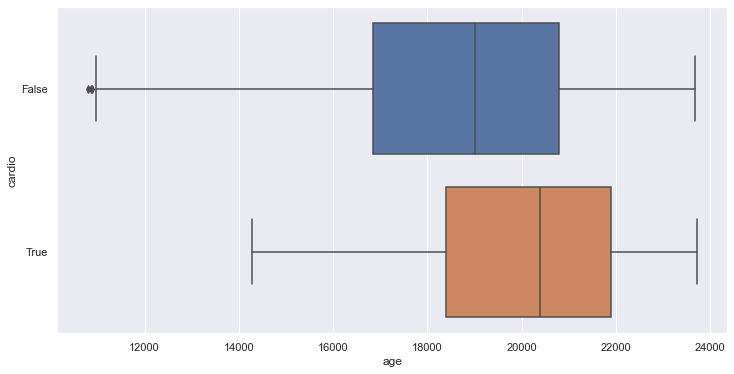

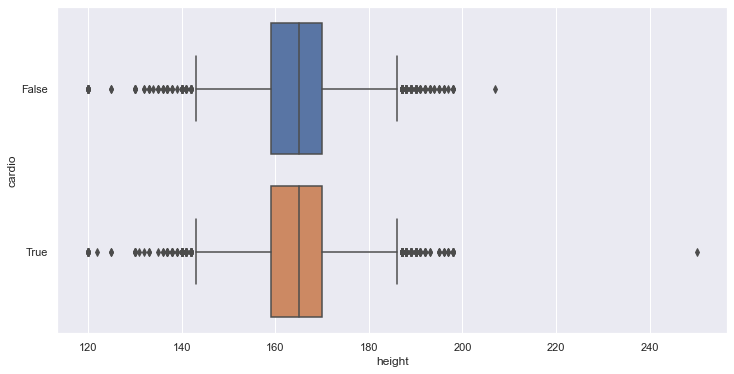

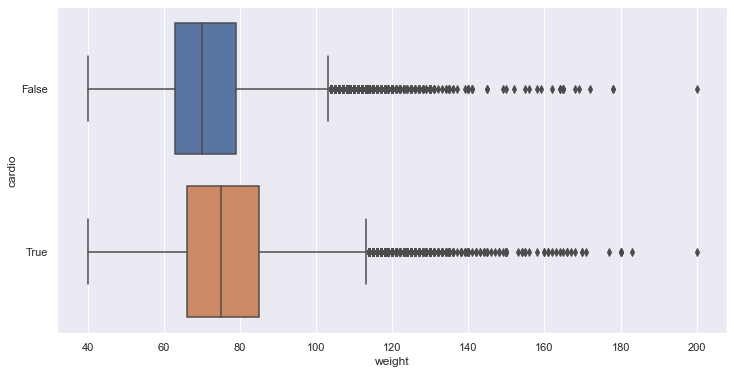

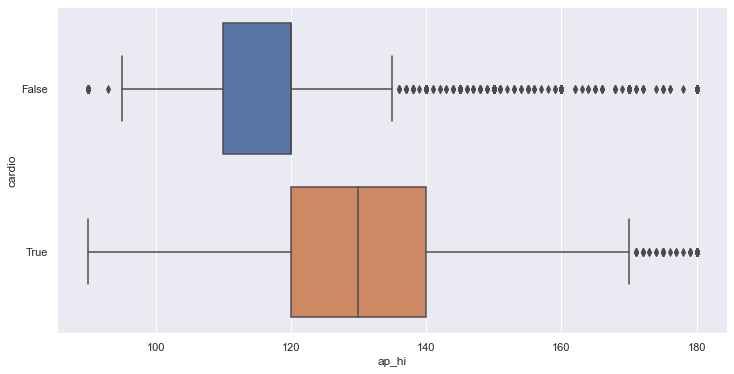

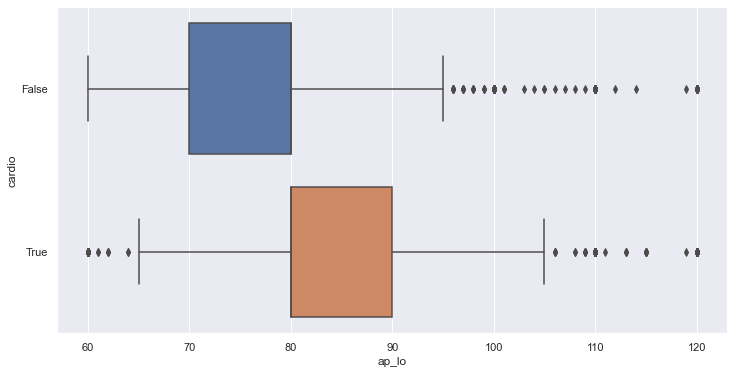

In [17]:
_temparr = ["id", "cardio", "smoke", "alco", "inactive", "gender", "total_unhealthy", "gluc", "cholesterol"]

for i in replaced:
    if i not in _temparr:
        f = plt.figure(figsize=(12, 6))
        sb.boxplot(x = i, y = "cardio", data = replaced, orient = "h")

# Let condition_1: total_unhealthy == 3 && cardio == 0

In [53]:
test = replaced[(replaced['total_unhealthy'] == 3) & (replaced['cardio'] == False)]

In [54]:
replaced['condition_1'] = (replaced['total_unhealthy'] == 3) & (replaced['cardio'] == False)

In [55]:
unhealthylifestyle_healthy = replaced.loc[(replaced['condition_1'] == True)]
unhealthylifestyle_healthy.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.0
mean,54896.224000,18189.880000,1.904000,169.312000,76.70240,121.408000,79.536000,1.272000,1.168000,3.0
std,28428.554724,2415.300938,0.295777,7.614096,15.74936,11.836314,8.143416,0.559031,0.503792,0.0
min,321.000000,14440.000000,1.000000,151.000000,45.00000,100.000000,60.000000,1.000000,1.000000,3.0
25%,29857.000000,16054.000000,2.000000,165.000000,66.00000,120.000000,80.000000,1.000000,1.000000,3.0
50%,56653.000000,18135.000000,2.000000,169.000000,75.00000,120.000000,80.000000,1.000000,1.000000,3.0
75%,78658.000000,19808.000000,2.000000,174.000000,83.00000,127.000000,80.000000,1.000000,1.000000,3.0
max,99251.000000,23507.000000,2.000000,193.000000,130.00000,180.000000,100.000000,3.000000,3.000000,3.0


<AxesSubplot:xlabel='count', ylabel='gender'>

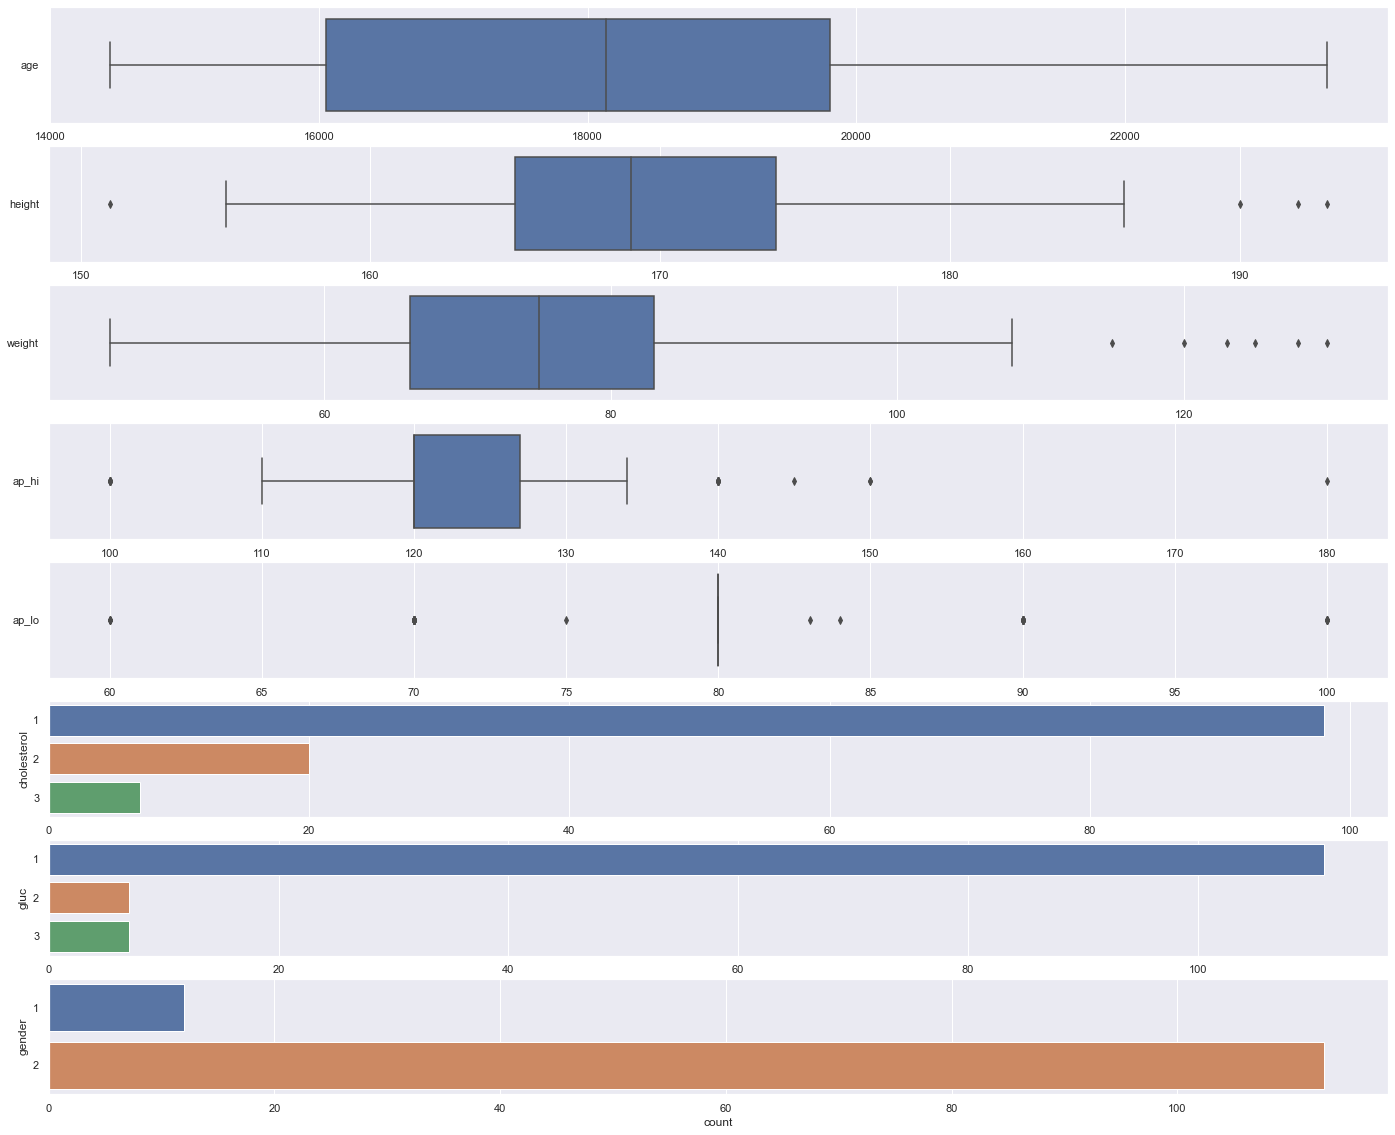

In [56]:
f, axes = plt.subplots(8, 1, figsize=(24, 20))

sb.boxplot(data = unhealthylifestyle_healthy[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["ap_lo"]], ax = axes[4], orient = "h")
sb.countplot(data = unhealthylifestyle_healthy, ax = axes[5], y = "cholesterol")
sb.countplot(data = unhealthylifestyle_healthy, ax = axes[6], y = "gluc")
sb.countplot(data = unhealthylifestyle_healthy, ax = axes[7], y = "gender")

In [107]:
_temp = ["total_unhealthy", "id", 'smoke', 'alco', 'inactive', 'cardio', 'condition_1']
y = replaced[['condition_1']]
X = replaced[[i for i in list(replaced.columns) if (i not in _temp)]]
# X = replaced[['smoke', 'alco', 'inactive']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9981793621894638

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9981207423067888



<AxesSubplot:>

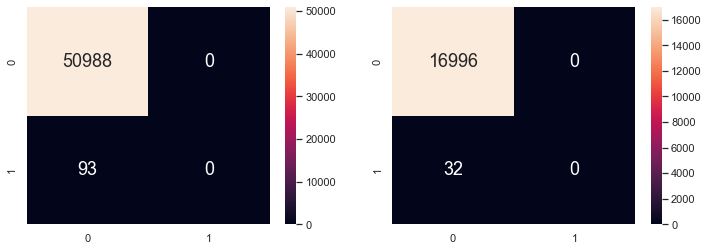

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

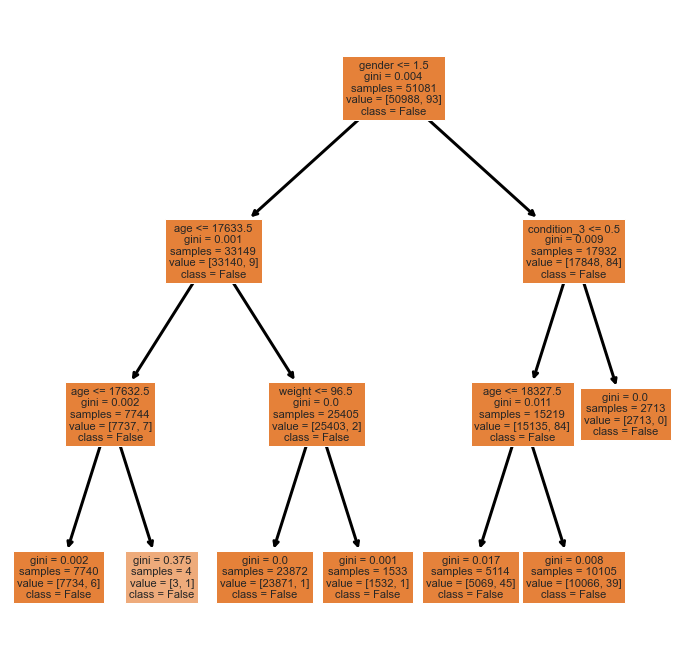

In [112]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

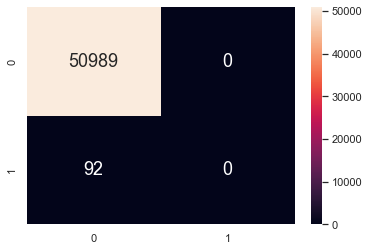

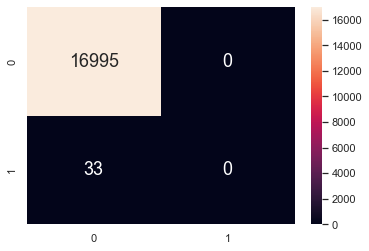

Train Model Accuracy:  0.9981989389401147
Test Model Prediction Accuracy:  0.998062015503876


In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 18)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

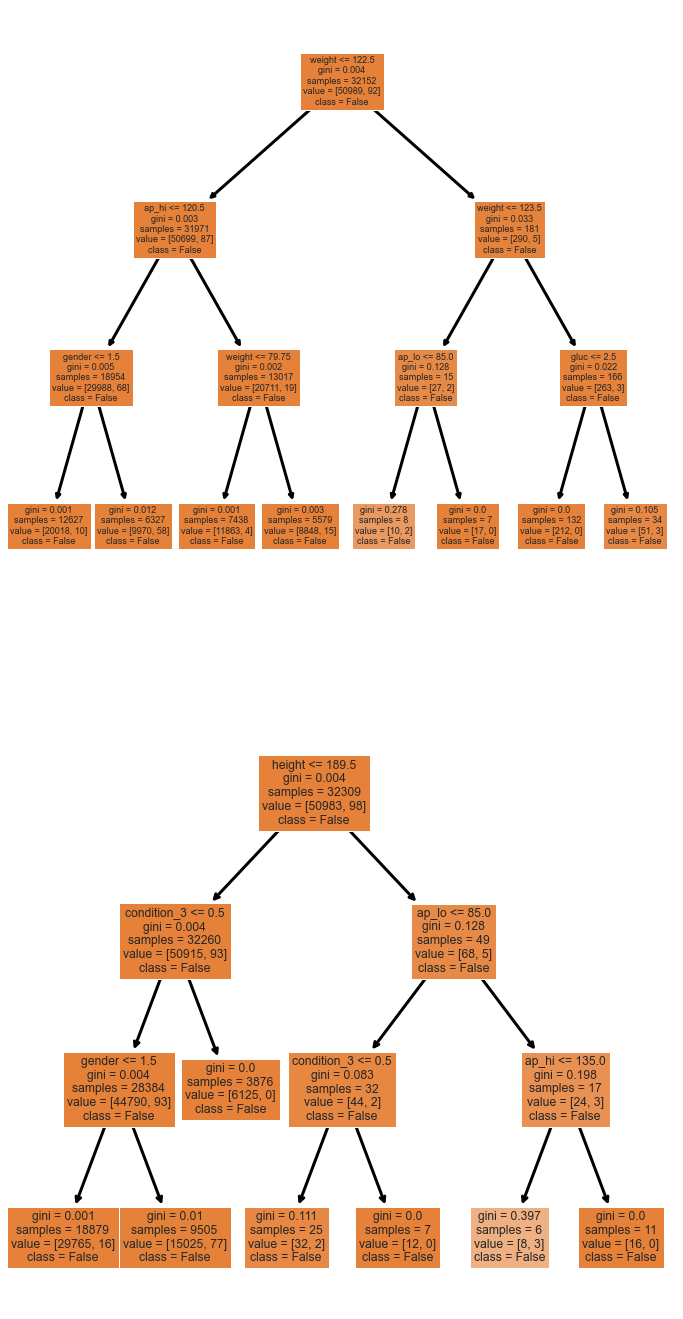

In [114]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f, axes = plt.subplots(2, 1, figsize=(12, 24))

count = 0;

for i in range(2):
    for j in range(1):
        out = plot_tree(randomforest.estimators_[count], 
                  feature_names = X_train.columns,
                  class_names = [str(x) for x in dectree.classes_],
                  filled=True,
                  ax = axes[i]
                       )

        for o in out:
            arrow = o.arrow_patch
            if arrow is not None:
                arrow.set_edgecolor('black')
                arrow.set_linewidth(3)
        count = count + 1
plt.show()

# Let condition_2: total_unhealthy == 2 && cardio == 0

In [60]:
test = replaced[(replaced['total_unhealthy'] == 2) & (replaced['cardio'] == False)]

In [61]:
replaced['condition_2'] = (replaced['total_unhealthy'] == 2) & (replaced['cardio'] == False)

In [62]:
somewhatunhealthylifestyle_healthy = replaced.loc[(replaced["condition_2"] == True)]
somewhatunhealthylifestyle_healthy.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.0
mean,49719.194465,18592.222887,1.836948,169.082274,74.944428,120.751683,78.601346,1.228871,1.161556,2.0
std,28544.664237,2423.767695,0.369551,7.588053,13.592061,11.661761,7.749276,0.517628,0.473160,0.0
min,23.000000,14296.000000,1.000000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000,2.0
25%,25985.000000,16674.000000,2.000000,164.000000,65.000000,116.000000,70.000000,1.000000,1.000000,2.0
50%,49310.000000,18797.000000,2.000000,169.000000,73.000000,120.000000,80.000000,1.000000,1.000000,2.0
75%,74056.000000,20450.000000,2.000000,174.000000,82.000000,125.000000,80.000000,1.000000,1.000000,2.0
max,99971.000000,23556.000000,2.000000,193.000000,178.000000,170.000000,110.000000,3.000000,3.000000,2.0


<AxesSubplot:xlabel='count', ylabel='gender'>

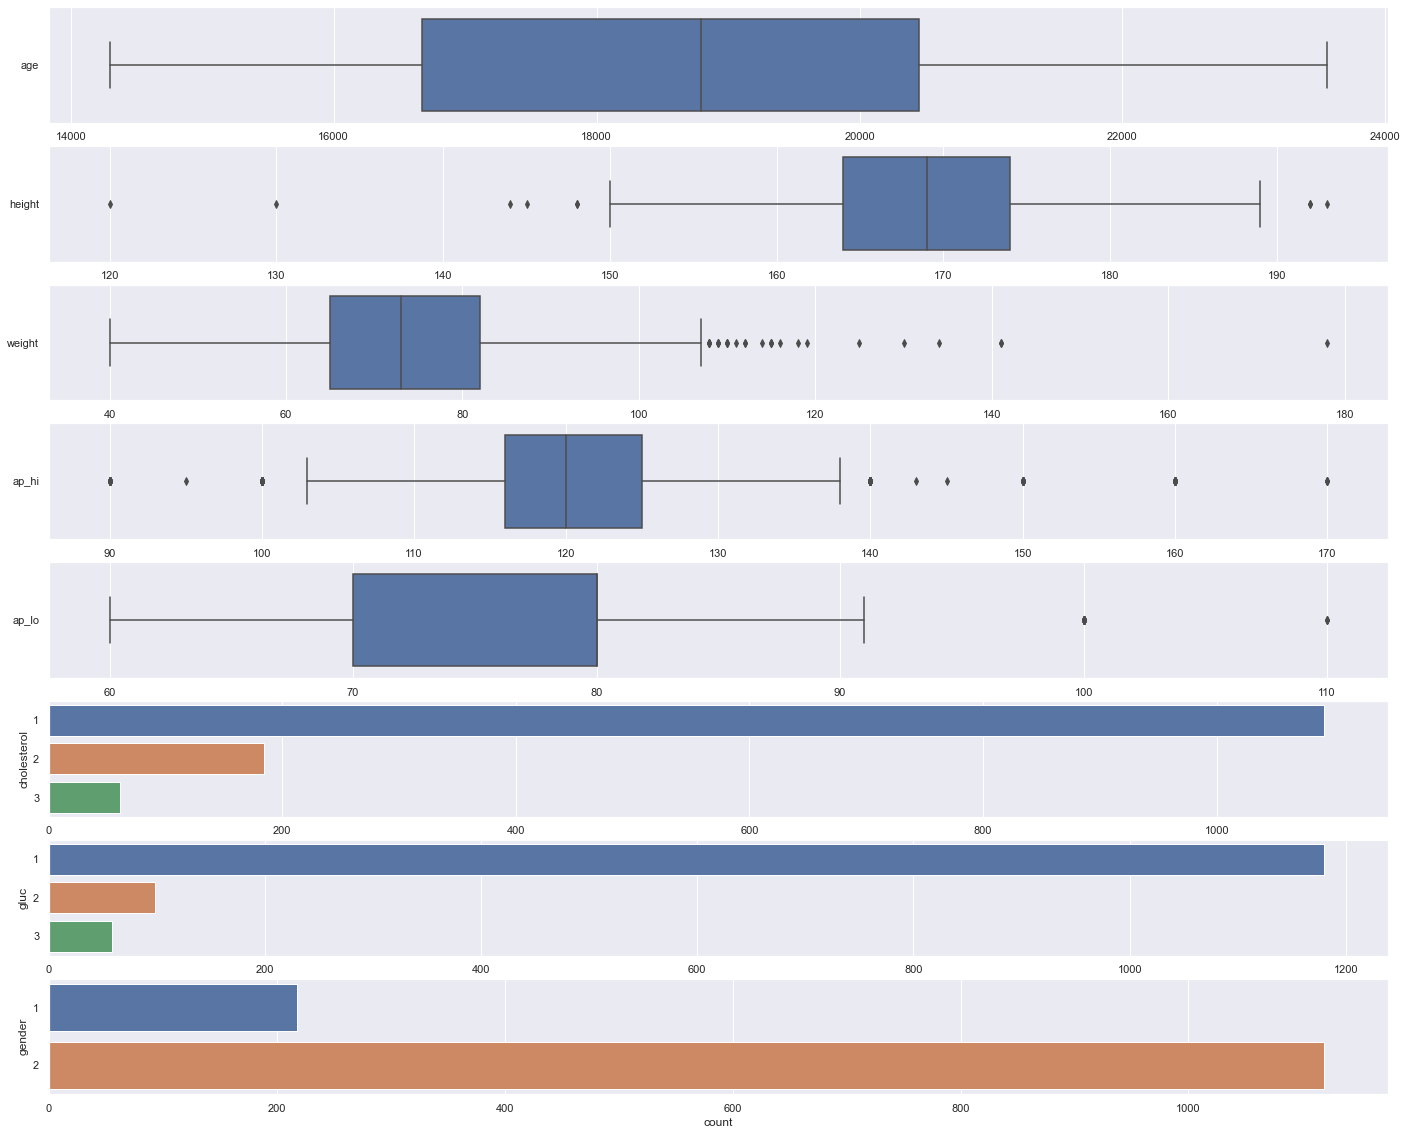

In [63]:
f, axes = plt.subplots(8, 1, figsize=(24, 20))

sb.boxplot(data = somewhatunhealthylifestyle_healthy[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = somewhatunhealthylifestyle_healthy[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = somewhatunhealthylifestyle_healthy[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = somewhatunhealthylifestyle_healthy[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = somewhatunhealthylifestyle_healthy[["ap_lo"]], ax = axes[4], orient = "h")
sb.countplot(data = somewhatunhealthylifestyle_healthy, ax = axes[5], y = "cholesterol")
sb.countplot(data = somewhatunhealthylifestyle_healthy, ax = axes[6], y = "gluc")
sb.countplot(data = somewhatunhealthylifestyle_healthy, ax = axes[7], y = "gender")

In [115]:
_temp = ["total_unhealthy", "id", 'smoke', 'alco', 'inactive', 'cardio', 'condition_1', 'condition_2']
y = replaced[['condition_2']]
X = replaced[[i for i in list(replaced.columns) if (i not in _temp)]]
# X = replaced[['smoke', 'alco', 'inactive']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9798555235801961

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9819121447028424



<AxesSubplot:>

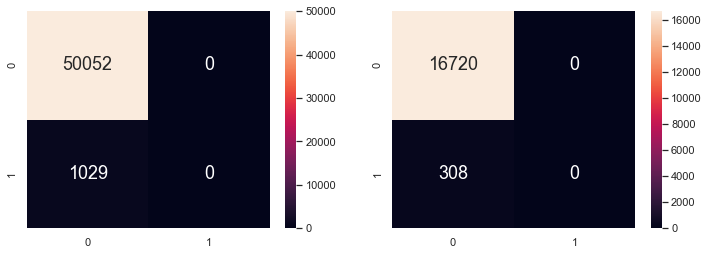

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

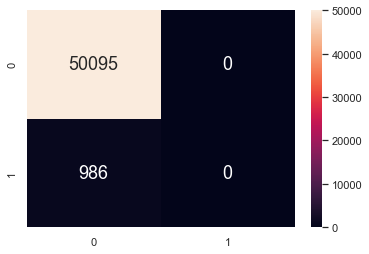

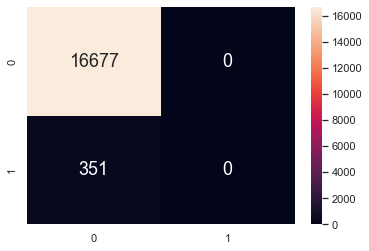

Train Model Accuracy:  0.980697323858186
Test Model Prediction Accuracy:  0.9793868921775899


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 18)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

# Let condition_3: total_unhealthy == 1 && cardio == 0

In [66]:
replaced['condition_3'] = (replaced['total_unhealthy'] == 1) & (replaced['cardio'] == False)

In [67]:
barelyunhealthylifestyle_healthy = replaced.loc[(replaced["condition_3"] == True)]
barelyunhealthylifestyle_healthy.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.0
mean,49400.394454,18821.887281,1.432911,165.419048,72.354864,119.996142,78.378541,1.230621,1.189512,1.0
std,28865.764112,2498.112463,0.495509,8.002693,13.541039,12.294571,8.046041,0.541704,0.525924,0.0
min,4.000000,14282.000000,1.000000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000,1.0
25%,24059.000000,16783.000000,1.000000,160.000000,63.000000,110.000000,70.000000,1.000000,1.000000,1.0
50%,49413.000000,18981.000000,1.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,1.0
75%,74137.000000,20643.000000,2.000000,170.000000,80.000000,120.000000,80.000000,1.000000,1.000000,1.0
max,99993.000000,23667.000000,2.000000,207.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.0


<AxesSubplot:xlabel='count', ylabel='gender'>

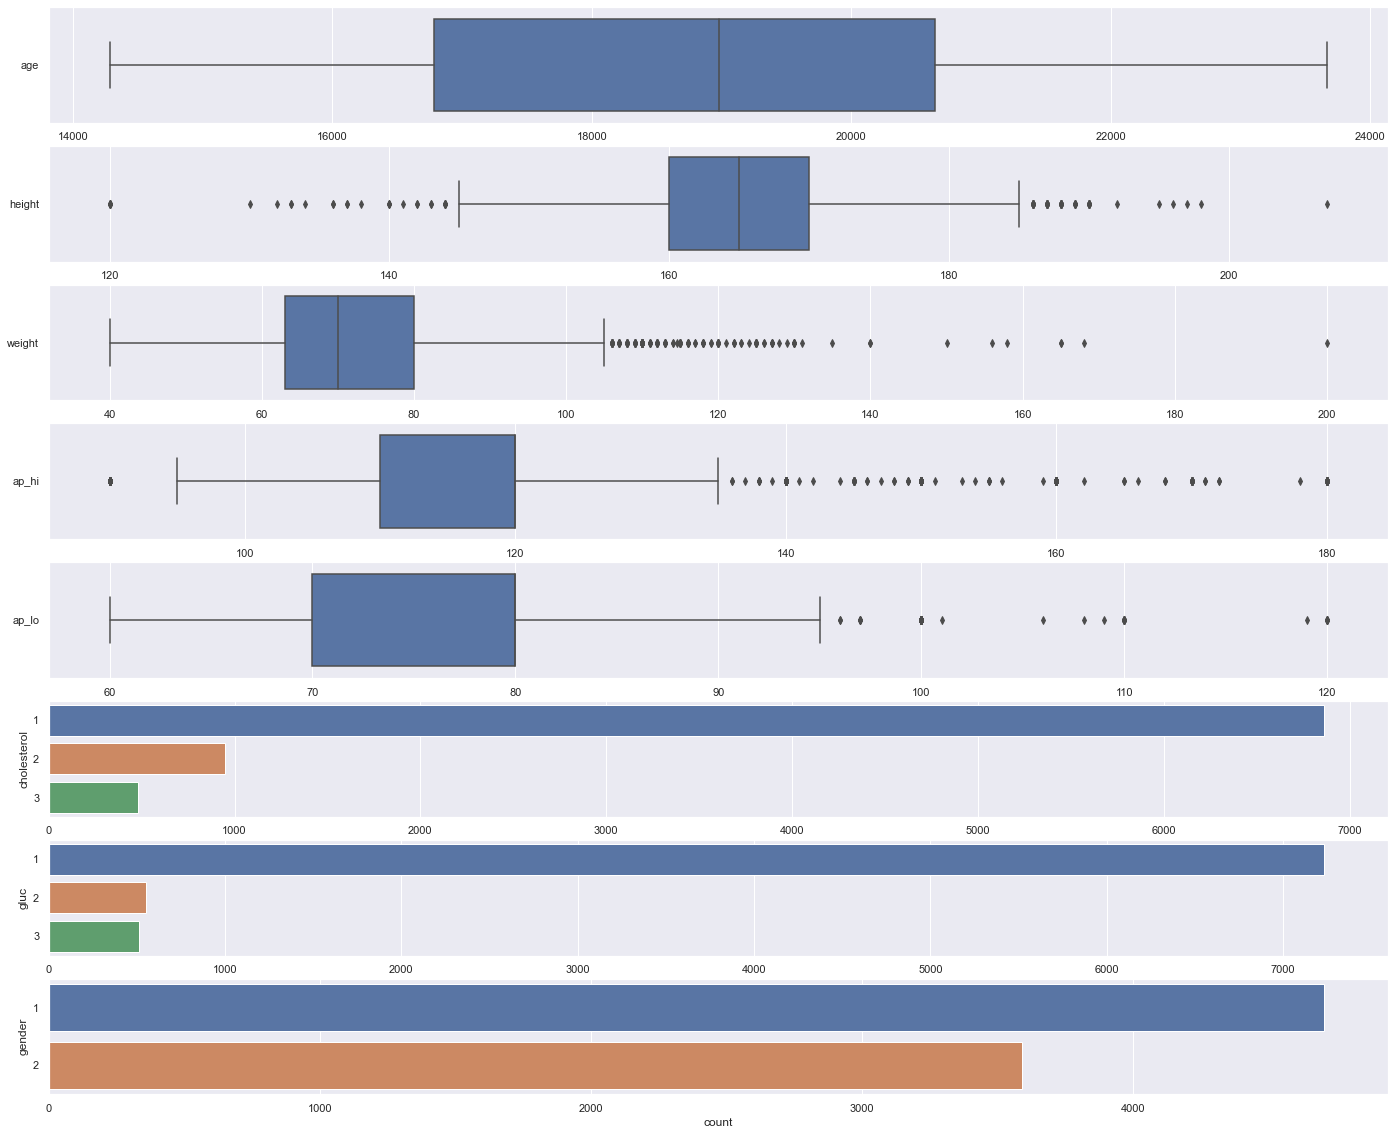

In [68]:
f, axes = plt.subplots(8, 1, figsize=(24, 20))

sb.boxplot(data = barelyunhealthylifestyle_healthy[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = barelyunhealthylifestyle_healthy[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = barelyunhealthylifestyle_healthy[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = barelyunhealthylifestyle_healthy[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = barelyunhealthylifestyle_healthy[["ap_lo"]], ax = axes[4], orient = "h")
sb.countplot(data = barelyunhealthylifestyle_healthy, ax = axes[5], y = "cholesterol")
sb.countplot(data = barelyunhealthylifestyle_healthy, ax = axes[6], y = "gluc")
sb.countplot(data = barelyunhealthylifestyle_healthy, ax = axes[7], y = "gender")

In [118]:
_temp = ["total_unhealthy", "id", 'smoke', 'alco', 'inactive', 'cardio', 'condition_1', 'condition_2', 'condition_3']
y = replaced[['condition_3']]
X = replaced[[i for i in list(replaced.columns) if (i not in _temp)]]
# X = replaced[['smoke', 'alco', 'inactive']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8783696482057908

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8775546159267089



<AxesSubplot:>

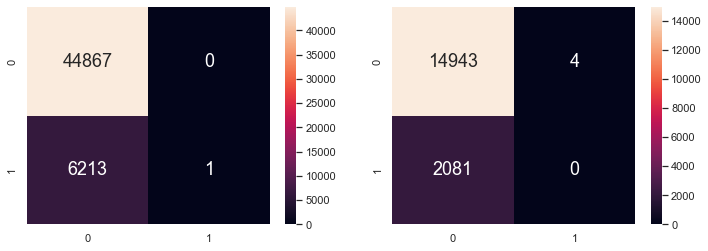

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

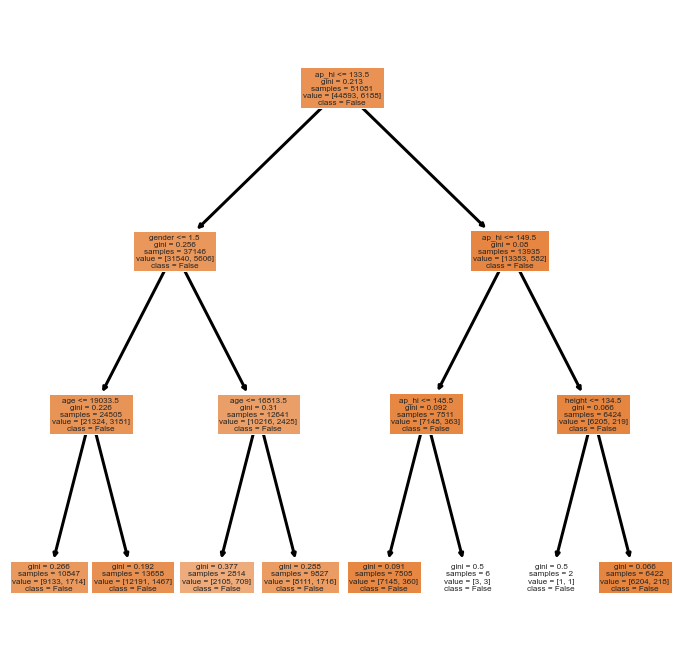

In [74]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

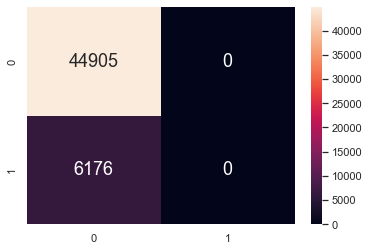

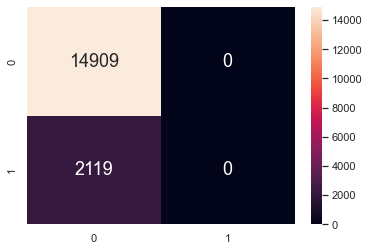

Train Model Accuracy:  0.8790939879798751
Test Model Prediction Accuracy:  0.875557904627672


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 18)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

---

# Check All Healthy (Meaning If Cardio = 0)

In [31]:
healthy = replaced[replaced['cardio'] == 0]
# healthy = healthy.drop(columns=['id'], axis=1)
healthy.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,34477.000000,34477.000000,34477.00000,34477.000000,34477.000000,34477.000000,34477.000000,34477.000000,34477.000000,34477.000000
mean,49861.040752,18879.399368,1.34597,164.536677,71.618814,119.606027,78.173594,1.215564,1.175073,0.329031
std,28872.321816,2471.410021,0.47569,7.800173,13.201938,12.085391,7.951486,0.526145,0.509489,0.565766
min,0.000000,10798.000000,1.00000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000,0.000000
25%,24725.000000,16839.000000,1.00000,159.000000,63.000000,110.000000,70.000000,1.000000,1.000000,0.000000
50%,49855.000000,19004.000000,1.00000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,74731.000000,20802.000000,2.00000,170.000000,79.000000,120.000000,80.000000,1.000000,1.000000,1.000000
max,99999.000000,23678.000000,2.00000,207.000000,200.000000,180.000000,120.000000,3.000000,3.000000,3.000000


<AxesSubplot:>

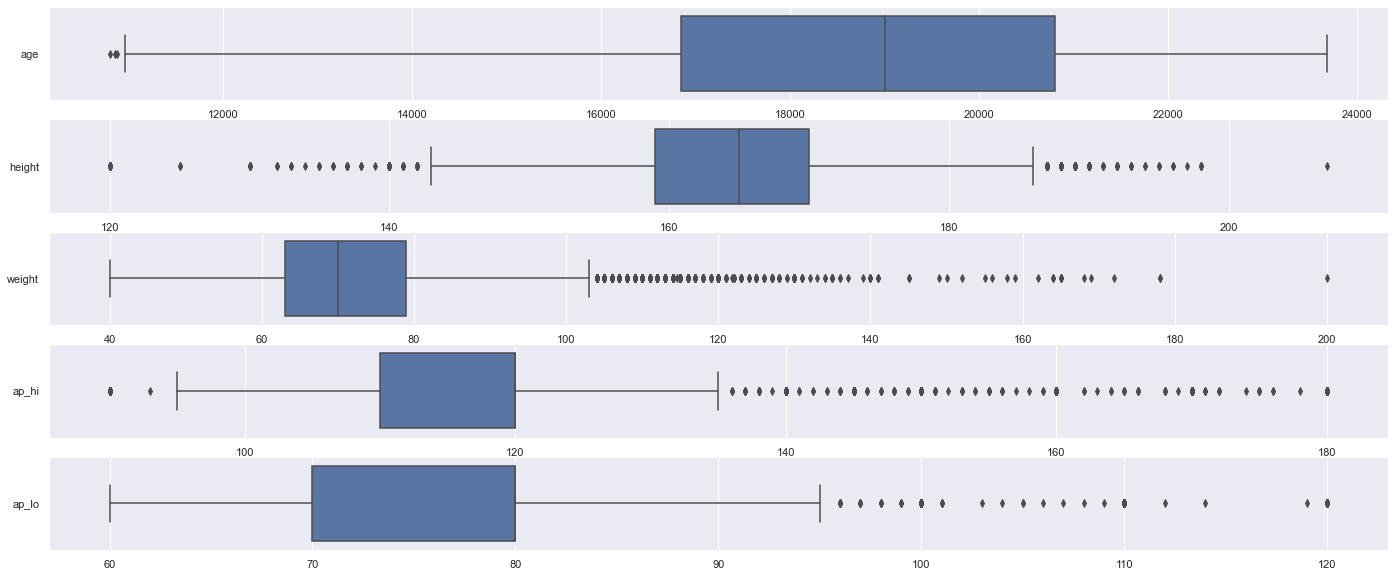

In [32]:
f, axes = plt.subplots(5, 1, figsize=(24, 10))

sb.boxplot(data = healthy[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = healthy[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = healthy[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = healthy[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = healthy[["ap_lo"]], ax = axes[4], orient = "h")

<AxesSubplot:xlabel='count', ylabel='total_unhealthy'>

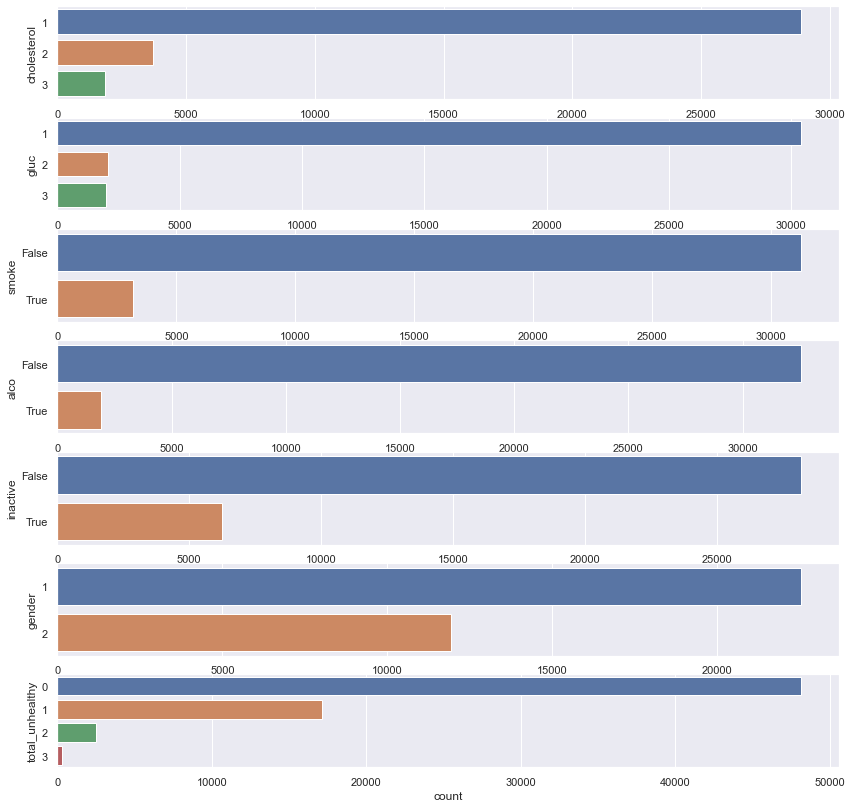

In [33]:
f, axes = plt.subplots(7, 1, figsize=(14, 14))

sb.countplot(data = healthy, ax = axes[0], y = "cholesterol")
sb.countplot(data = healthy, ax = axes[1], y = "gluc")
sb.countplot(data = healthy, ax = axes[2], y = "smoke")
sb.countplot(data = healthy, ax = axes[3], y = "alco")
sb.countplot(data = healthy, ax = axes[4], y = "inactive")
sb.countplot(data = healthy, ax = axes[5], y = "gender")
sb.countplot(data = replaced, ax = axes[6], y = "total_unhealthy")

# Check All w/ unhealthy lifestyle (Meaning total_unhealthy = 3)

In [34]:
unhealthylifestyle = replaced.loc[replaced['total_unhealthy'] == 3]
# healthy = healthy.drop(columns=['id'], axis=1)
unhealthylifestyle.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.0
mean,52108.245421,18947.604396,1.897436,169.538462,80.679121,129.509158,83.010989,1.406593,1.234432,3.0
std,29513.846531,2593.816161,0.303946,7.370411,16.465446,15.675269,9.220535,0.685641,0.565544,0.0
min,180.000000,14440.000000,1.000000,147.000000,45.000000,100.000000,60.000000,1.000000,1.000000,3.0
25%,26138.000000,16838.000000,2.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,3.0
50%,52069.000000,18904.000000,2.000000,170.000000,77.000000,130.000000,80.000000,1.000000,1.000000,3.0
75%,78413.000000,20973.000000,2.000000,174.000000,90.000000,140.000000,90.000000,2.000000,1.000000,3.0
max,99958.000000,23619.000000,2.000000,193.000000,144.000000,180.000000,120.000000,3.000000,3.000000,3.0


<AxesSubplot:xlabel='count', ylabel='gender'>

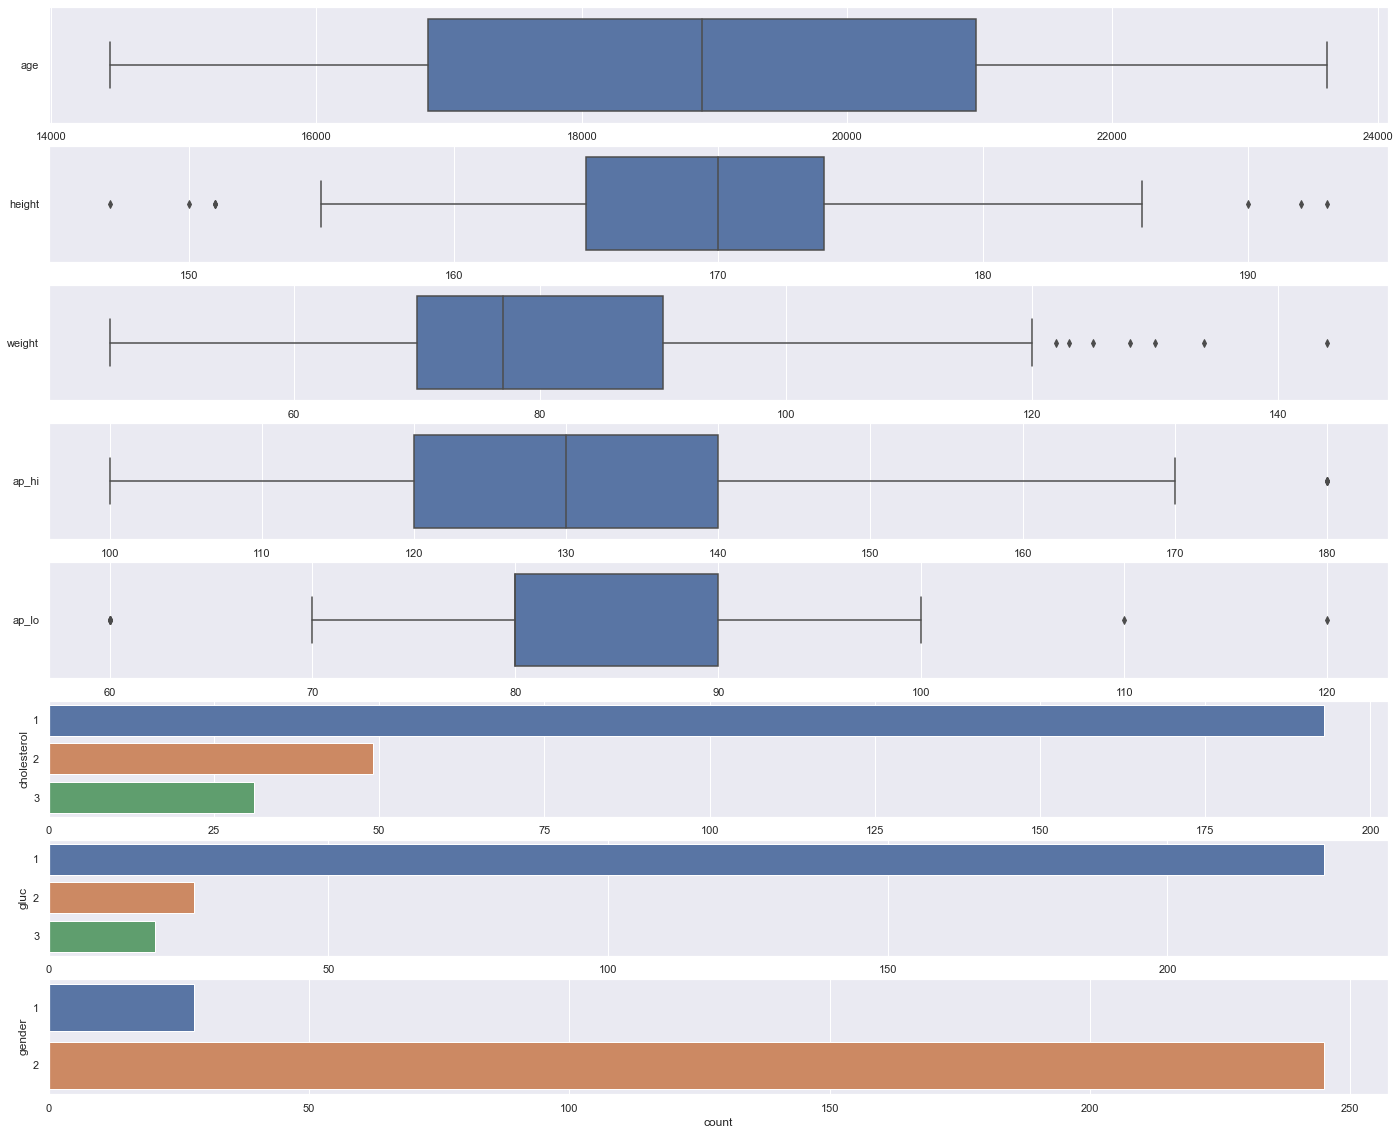

In [35]:
f, axes = plt.subplots(8, 1, figsize=(24, 20))

sb.boxplot(data = unhealthylifestyle[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = unhealthylifestyle[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = unhealthylifestyle[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = unhealthylifestyle[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = unhealthylifestyle[["ap_lo"]], ax = axes[4], orient = "h")
sb.countplot(data = unhealthylifestyle, ax = axes[5], y = "cholesterol")
sb.countplot(data = unhealthylifestyle, ax = axes[6], y = "gluc")
sb.countplot(data = unhealthylifestyle, ax = axes[7], y = "gender")

Notice the ratio between men & women and the total count of only 273

# Check somewhat unhealthy that are healthy (Cardio = 0 while total_unhealthy = 2)

In [39]:
somewhatunhealthylifestyle = replaced.loc[(replaced["total_unhealthy"] == 2)]
# somewhatunhealthylifestyle = somewhatunhealthylifestyle.loc[(replaced["cardio"] == 0)]
somewhatunhealthylifestyle.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,total_unhealthy
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.0
mean,49902.468077,19105.792498,1.833599,169.140064,77.946329,128.246608,82.322825,1.402634,1.211891,2.0
std,29005.652157,2478.669809,0.372514,7.703431,14.671543,16.348422,9.551078,0.685971,0.533315,0.0
min,23.000000,14296.000000,1.000000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000,2.0
25%,25207.500000,17334.500000,2.000000,164.000000,68.000000,120.000000,80.000000,1.000000,1.000000,2.0
50%,50139.500000,19117.500000,2.000000,169.000000,76.000000,120.000000,80.000000,1.000000,1.000000,2.0
75%,74893.250000,21102.000000,2.000000,175.000000,86.000000,140.000000,90.000000,2.000000,1.000000,2.0
max,99996.000000,23656.000000,2.000000,198.000000,178.000000,180.000000,120.000000,3.000000,3.000000,2.0


In [75]:
test = replaced.copy()

In [76]:
test.astype({'total_unhealthy': 'category'}).dtypes

id                    int64
age                   int64
gender                int64
height                int64
weight              float64
ap_hi                 int64
ap_lo                 int64
cholesterol           int64
gluc                  int64
smoke                  bool
alco                   bool
cardio                 bool
inactive               bool
total_unhealthy    category
condition_1            bool
condition_2            bool
condition_3            bool
dtype: object

In [77]:
_temp = ["total_unhealthy", "id", 'smoke', 'alco', 'inactive']
y = test[['total_unhealthy']]
X = test[[i for i in list(healthy.columns) if (i not in _temp)]]
# X = replaced[['smoke', 'alco', 'inactive']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8473796519253735

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8533004463237022



<AxesSubplot:>

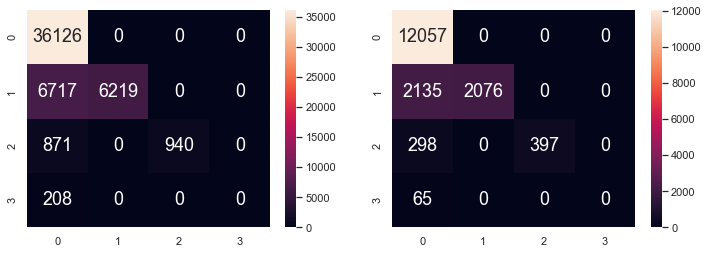

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

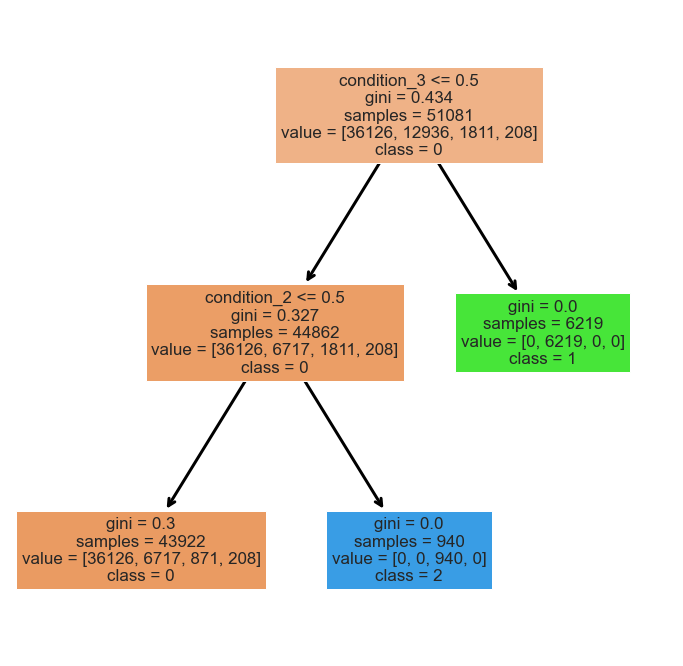

In [79]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# use classification tree for all unhealthy
#### Response Variable : i for i in list(cardio_data.columns) if i != 'cardio'
#### Predictor Feature : cardio

In [81]:
replaced.drop(columns=['id'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,inactive,total_unhealthy,condition_1,condition_2,condition_3
0,18393,2,168,62.0,110,80,1,1,False,False,False,False,0,False,False,False
1,20228,1,156,85.0,140,90,3,1,False,False,True,False,0,False,False,False
2,18857,1,165,64.0,130,70,3,1,False,False,True,True,1,False,False,False
3,17623,2,169,82.0,150,100,1,1,False,False,True,False,0,False,False,False
4,17474,1,156,56.0,100,60,1,1,False,False,False,True,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,True,False,False,False,1,False,False,True
69996,22601,1,158,126.0,140,90,2,2,False,False,True,False,0,False,False,False
69997,19066,2,183,105.0,180,90,3,1,False,True,True,True,2,False,False,False
69998,22431,1,163,72.0,135,80,1,2,False,False,True,True,1,False,False,False


In [82]:
y = unhealthylifestyle[['cardio']]
X = unhealthylifestyle[[i for i in list(unhealthylifestyle.columns) if (i != 'cardio' and i != 'id')]]
# X = cardio_data[['smoke', 'alco', 'active']]

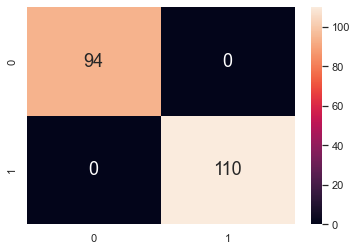

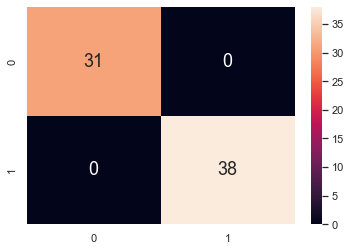

Train Model Accuracy:  1.0
Test Model Prediction Accuracy:  1.0


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 18)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

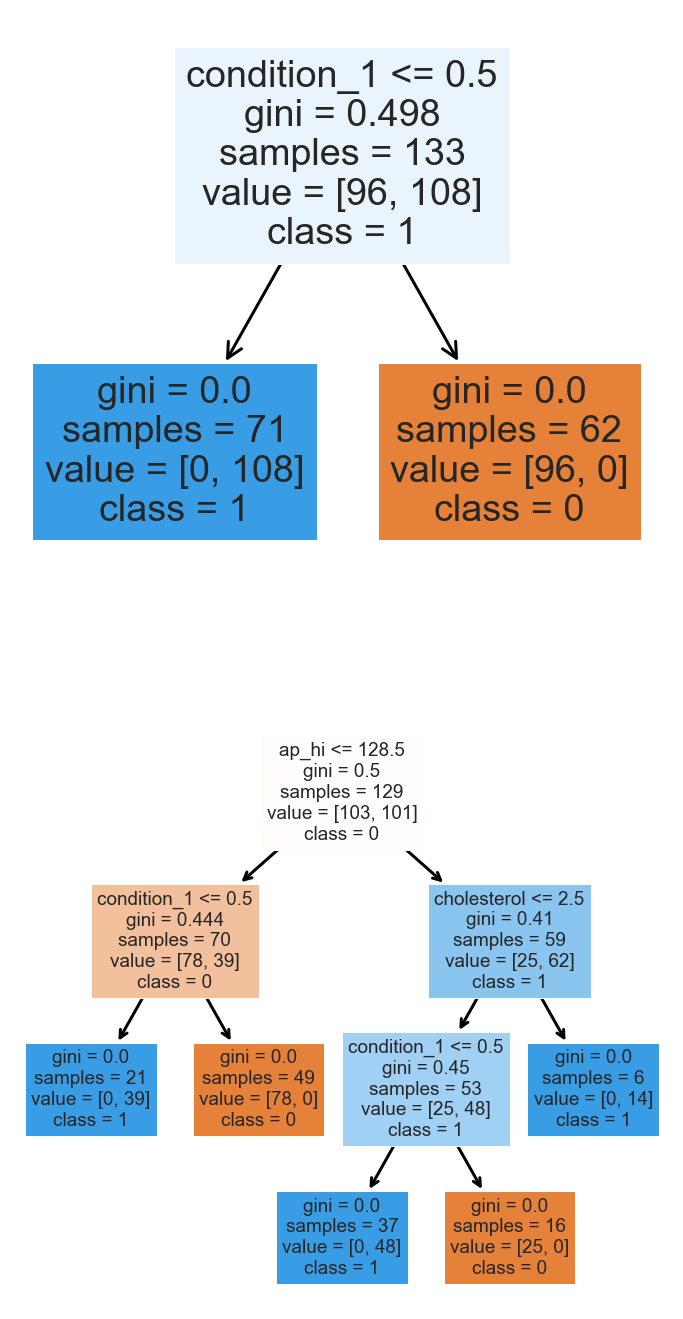

In [84]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f, axes = plt.subplots(2, 1, figsize=(12, 24))

count = 0;

for i in range(2):
    for j in range(1):
        out = plot_tree(randomforest.estimators_[count], 
                  feature_names = X_train.columns,
                  class_names = [str(x) for x in dectree.classes_],
                  filled=True,
                  ax = axes[i]
                       )

        for o in out:
            arrow = o.arrow_patch
            if arrow is not None:
                arrow.set_edgecolor('black')
                arrow.set_linewidth(3)
        count = count + 1
plt.show()

# use classification tree for somewhat unhealthy
#### Response Variable : i for i in list(somewhatunhealthylifestyle.columns) if i != 'cardio'
#### Predictor Feature : cardio

In [85]:
y = somewhatunhealthylifestyle[['cardio']]
X = somewhatunhealthylifestyle[[i for i in list(somewhatunhealthylifestyle.columns) if (i != 'cardio' and i != 'id')]]
# X = cardio_data[['smoke', 'alco', 'active']]

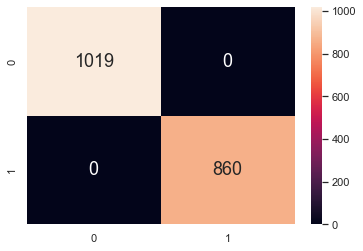

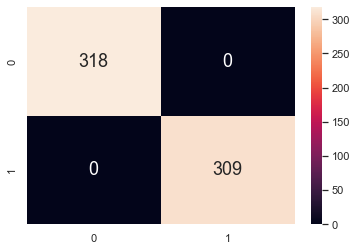

Train Model Accuracy:  1.0
Test Model Prediction Accuracy:  1.0


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 18)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

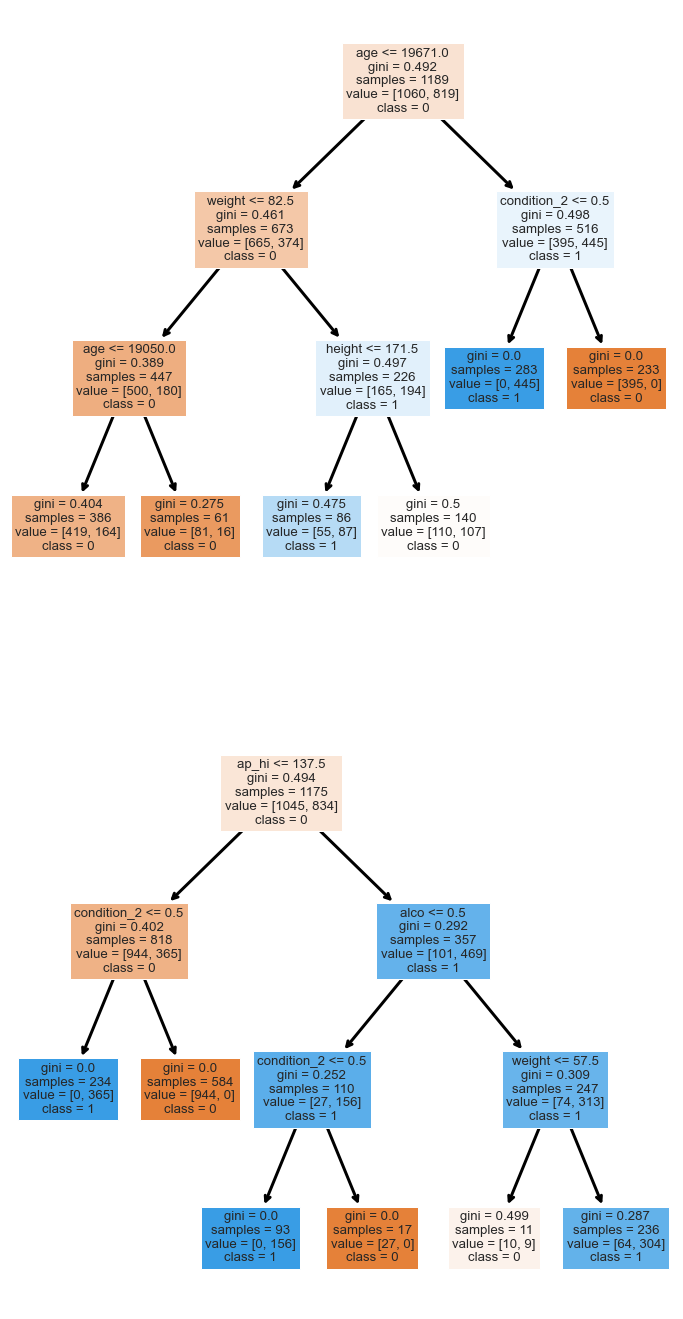

In [87]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f, axes = plt.subplots(2, 1, figsize=(12, 24))

count = 0;

for i in range(2):
    for j in range(1):
        out = plot_tree(randomforest.estimators_[count], 
                  feature_names = X_train.columns,
                  class_names = [str(x) for x in dectree.classes_],
                  filled=True,
                  ax = axes[i]
                       )

        for o in out:
            arrow = o.arrow_patch
            if arrow is not None:
                arrow.set_edgecolor('black')
                arrow.set_linewidth(3)
        count = count + 1
plt.show()

# Use classification tree for all healthy 
#### Response Variable : smoke, alco, active
#### Predictor Feature : cardio

In [88]:
_temp = ["total_unhealthy", "id", 'smoke', 'alco', 'inactive']
y = healthy[['total_unhealthy']]
X = healthy[[i for i in list(healthy.columns) if (i not in _temp)]]
# X = replaced[['smoke', 'alco', 'inactive']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9961712495649148

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9969837587006961



<AxesSubplot:>

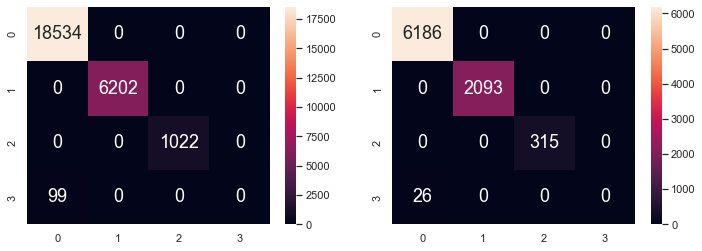

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

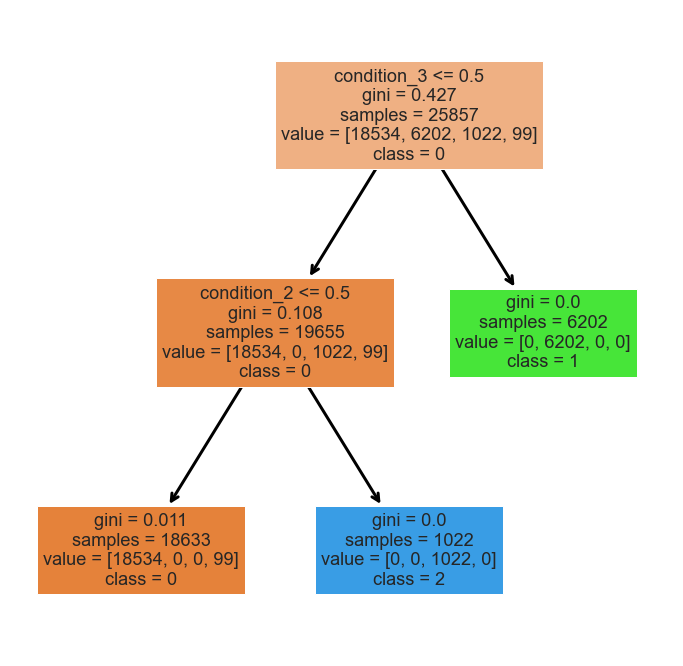

In [90]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Analysis using total_unhealthy

<AxesSubplot:xlabel='total_unhealthy', ylabel='count'>

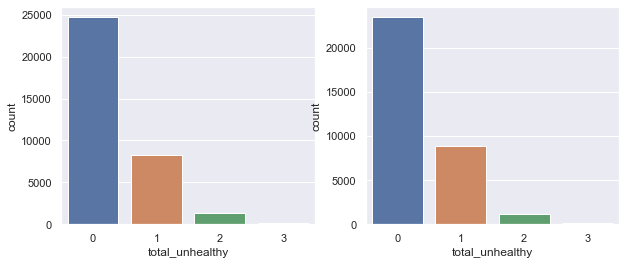

In [91]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
sb.countplot(data = replaced[replaced['cardio'] == 0], x = "total_unhealthy", ax = axes[0])
sb.countplot(data = replaced[replaced['cardio'] == 1], x = "total_unhealthy", ax = axes[1])

# use classification tree for replaced
#### Response Variable : inactive, alco, smoke, total_unhealthy
#### Predictor Feature : cardio

In [92]:
y = replaced[['total_unhealthy']]
# X = replaced[[i for i in list(replaced.columns) if (i != 'cardio' and i != 'id')]]
# X = replaced[['smoke', 'alco', 'inactive', 'total_unhealthy', 'cholesterol']]
X = replaced[['age', 'ap_hi', 'cholesterol']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7075820755271041

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7071294338736199



<AxesSubplot:>

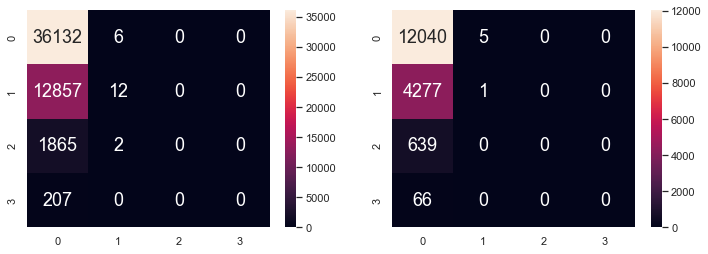

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

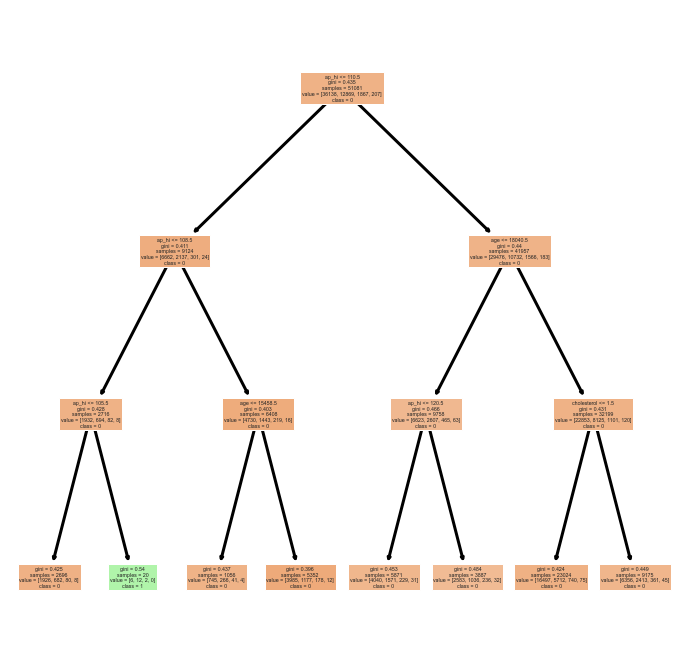

In [94]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Random Forest

In [95]:
y = replaced[['cardio']]
X = replaced[[i for i in list(unhealthylifestyle.columns) if (i != 'cardio' and i != 'id')]]
# X = cardio_data[['smoke', 'alco', 'active']]

In [96]:
# y = replaced[['cardio']]
# # X = cardio_data[[i for i in list(cardio_data.columns) if i != 'cardio']]
# X = replaced[['smoke', 'alco', 'inactive', 'total_unhealthy']]

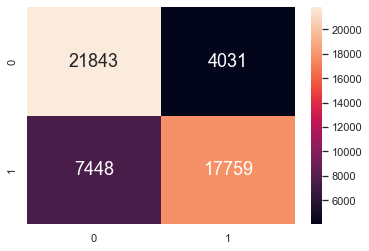

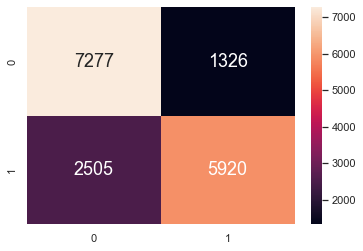

Train Model Accuracy:  0.7752784792780094
Test Model Prediction Accuracy:  0.7750176180408739


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 18)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

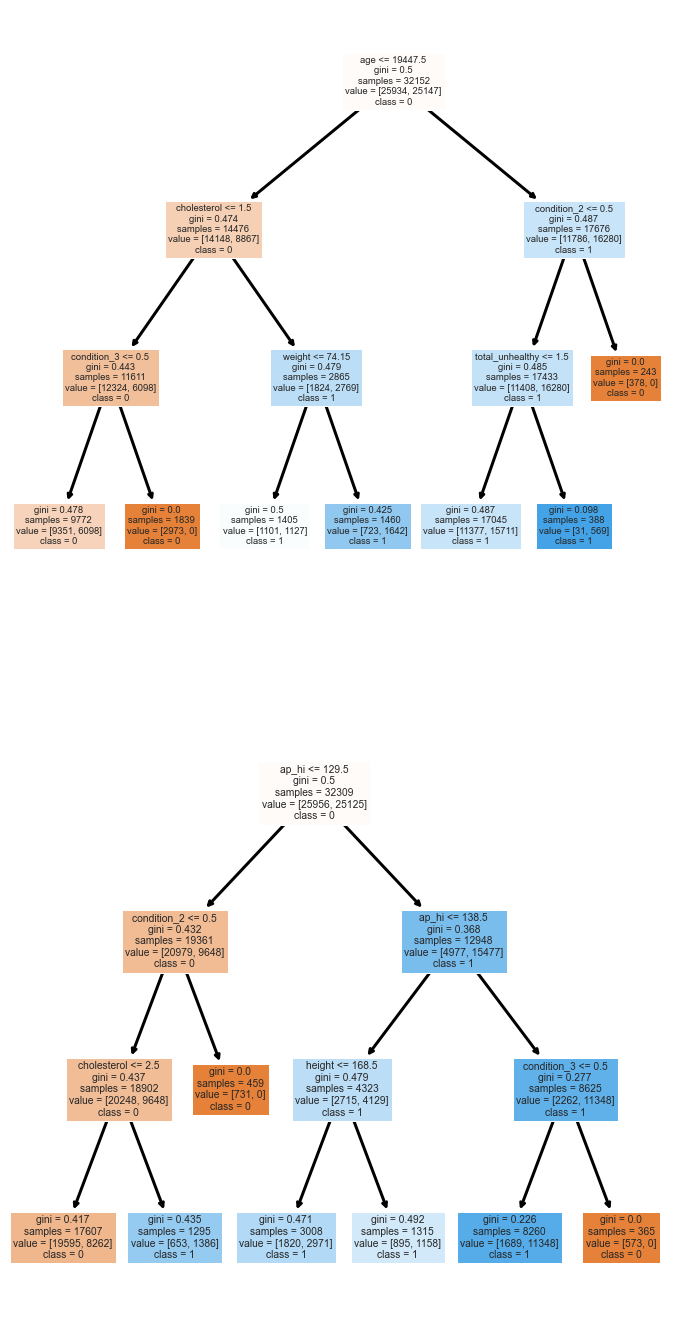

In [98]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f, axes = plt.subplots(2, 1, figsize=(12, 24))

count = 0;

for i in range(2):
    for j in range(1):
        out = plot_tree(randomforest.estimators_[count], 
                  feature_names = X_train.columns,
                  class_names = [str(x) for x in dectree.classes_],
                  filled=True,
                  ax = axes[i]
                       )

        for o in out:
            arrow = o.arrow_patch
            if arrow is not None:
                arrow.set_edgecolor('black')
                arrow.set_linewidth(3)
        count = count + 1
plt.show()

In [99]:
y = unhealthylifestyle[['total_unhealthy']]
X = unhealthylifestyle[[i for i in list(unhealthylifestyle.columns) if (i != 'cardio' and i != 'id')]]
# X = cardio_data[['smoke', 'alco', 'active']]

In [100]:
healthy.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,inactive,total_unhealthy,condition_1,condition_2,condition_3
0,0,18393,2,168,62.0,110,80,1,1,False,False,False,False,0,False,False,False
4,4,17474,1,156,56.0,100,60,1,1,False,False,False,True,1,False,False,True
5,8,21914,1,151,67.0,120,80,2,2,False,False,False,True,1,False,False,True
6,9,22113,1,157,93.0,130,80,3,1,False,False,False,False,0,False,False,False
8,13,17668,1,158,71.0,110,70,1,1,False,False,False,False,0,False,False,False


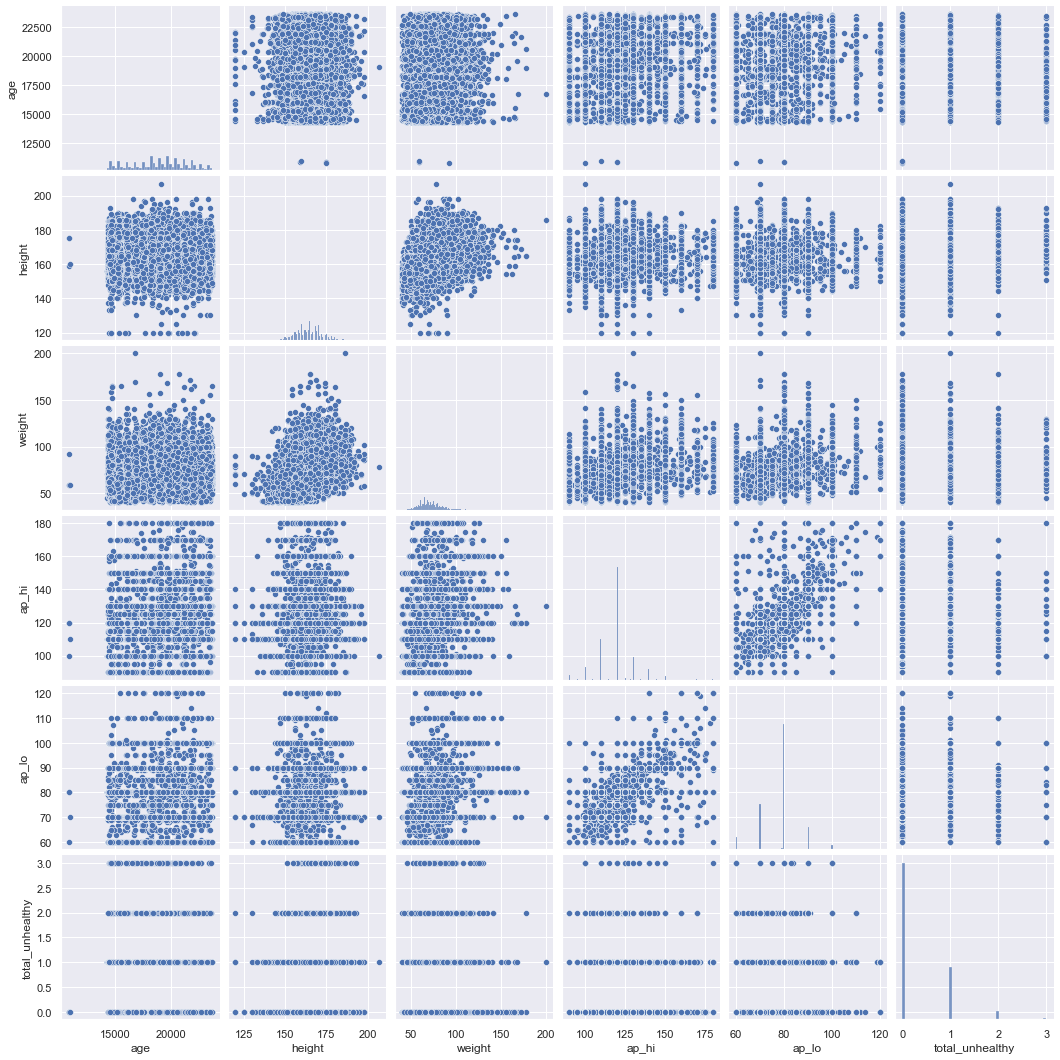

In [101]:
sb.pairplot(healthy[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'total_unhealthy']])

In [102]:
# X = healthy.drop(columns=['id'], axis=1)
# X = X.drop(columns=['cardio'], axis=1)
# X = X.drop(columns=['cardio'], axis=1)
# X = X.drop(columns=['cardio'], axis=1)
# X = X.drop(columns=['cardio'], axis=1)
# X = X.drop(columns=['cardio'], axis=1)
X = healthy[['ap_hi','total_unhealthy']]

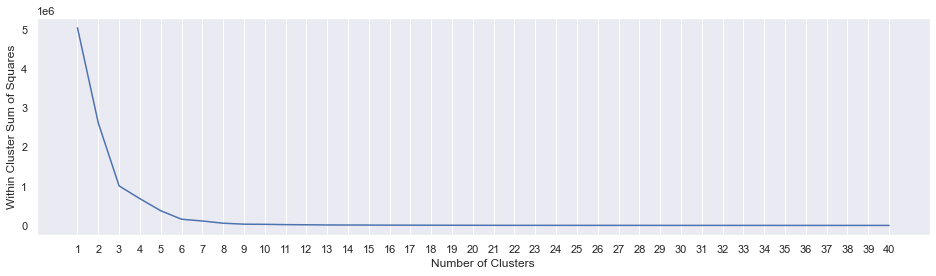

In [103]:
from sklearn.cluster import KMeans


# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [104]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 8
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_init=20)

Features 	age 		gender 	height 	aphi 	aplow 	chol 	gluc 	smoke 	alco 	card 	inac 	totalunhealthy

Cluster 0:	120.0	0.32	
Cluster 1:	129.64	0.4	
Cluster 2:	90.16	0.29	
Cluster 3:	174.37	0.37	
Cluster 4:	110.13	0.3	
Cluster 5:	139.95	0.37	
Cluster 6:	100.13	0.32	
Cluster 7:	154.03	0.32	

Within Cluster Sum of Squares : 57187.88710507254



<AxesSubplot:xlabel='Cluster', ylabel='count'>

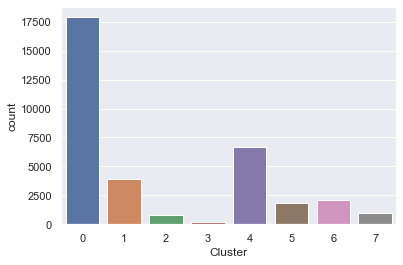

In [105]:
# Print the Cluster Centers
print("Features", "\tage", "\t\tgender", "\theight", "\taphi", "\taplow", "\tchol", "\tgluc", "\tsmoke", "\talco", "\tcard", "\tinac", "\ttotalunhealthy")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

<AxesSubplot:xlabel='Cluster'>

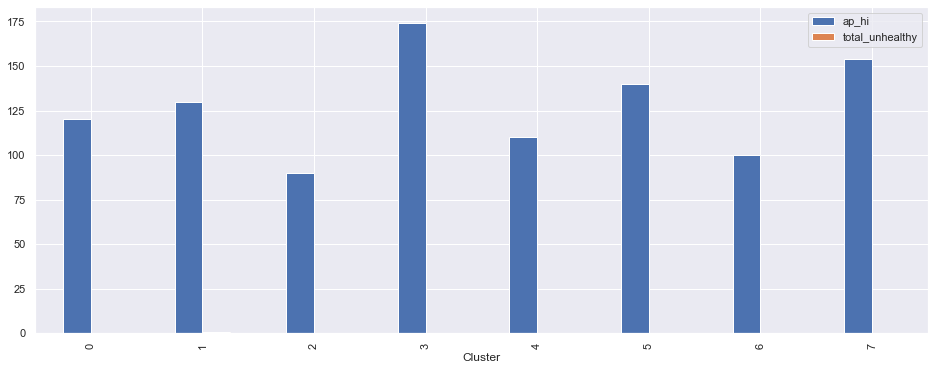

In [106]:
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))